In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
import MySuperLight


In [2]:
image = Image.open('TrioDot.png')
TrioDot = np.asarray(image) / 255
TrioDot.shape

(64, 64, 3)

In [3]:
def GetTestPicture(numbero_uno):
    global myNormal, myPhoto, myVector, myAlbedo, myMask, myDepth
    myNormal = np.load('BigDataCubes\CombinedDatasets\Part0Normals.npy')[numbero_uno]
    myPhoto = np.load('BigDataCubes\CombinedDatasets\Part0Photos.npy')[numbero_uno]
    myVector = np.load('BigDataCubes\CombinedDatasets\Part0Vectors.npy')[numbero_uno]
    myAlbedo = np.load('BigDataCubes\CombinedDatasets\Part0Albedos.npy')[numbero_uno]
    myMask = np.load('BigDataCubes\CombinedDatasets\Part0Masks.npy')[numbero_uno]
    myDepth = np.load('BigDataCubes\CombinedDatasets\Part0Depth.npy')[numbero_uno]

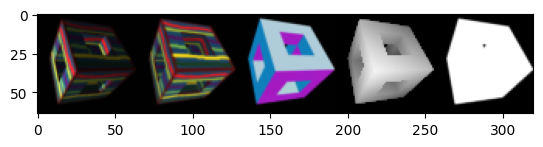

In [4]:
numbero_uno = 2 # 21 - pringle | 9 - donut
blurNormal = np.load('Sharpening/SharpenInputs/small_blurry_predictions.npy')[numbero_uno]
GetTestPicture(numbero_uno)
plt.imshow(np.concatenate([myPhoto, myAlbedo, myNormal, myDepth, myMask], axis = 1).astype("float32"))
#plt.imshow(myPhoto.astype("float32"))

In [5]:
one_light_direction = [0, 2, 0.8]

FRAME GEN BEGUN...
FRAME GEN FINISHED!


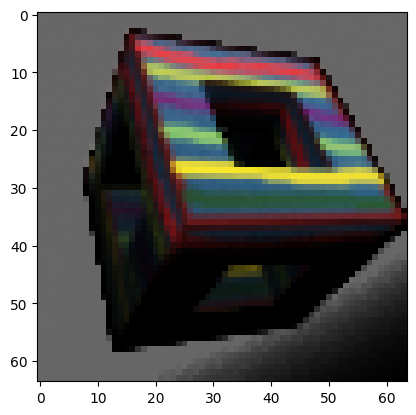

In [6]:
plt.imshow(MySuperLight.single_frame_pipe(myNormal, myAlbedo, myDepth, myMask, one_light_direction, 
                        specular_color = 0.3, ambient_color = 0, 
                        reflection_factor = 5, light_strength = 4,
                        threshhold = 0.00001, column_fat = 0.05, sss = 0.25,
                        volume_normal_ratio = 0.4, mask_prominence = 0))

In [7]:
def rotate_vector(my_vector, degrees):
    x, y = my_vector
    pies = math.radians(degrees)
    new_x = x * math.cos(pies) - y * math.sin(pies)
    new_y = x * math.sin(pies) + y * math.cos(pies)
    return (round(new_x, 2),round(new_y, 2))
    
vector_list = np.zeros((24, 3))
vector_to_add = [0, -2, 0.8]
for i in range(24):
    new_x, new_y = rotate_vector((vector_to_add[0], vector_to_add[1]), 15 * i)
    vector_list[i][0] = new_x
    vector_list[i][1] = new_y
    vector_list[i][2] = vector_to_add[2]
print(vector_list, myVector)


[[ 0.   -2.    0.8 ]
 [ 0.52 -1.93  0.8 ]
 [ 1.   -1.73  0.8 ]
 [ 1.41 -1.41  0.8 ]
 [ 1.73 -1.    0.8 ]
 [ 1.93 -0.52  0.8 ]
 [ 2.   -0.    0.8 ]
 [ 1.93  0.52  0.8 ]
 [ 1.73  1.    0.8 ]
 [ 1.41  1.41  0.8 ]
 [ 1.    1.73  0.8 ]
 [ 0.52  1.93  0.8 ]
 [ 0.    2.    0.8 ]
 [-0.52  1.93  0.8 ]
 [-1.    1.73  0.8 ]
 [-1.41  1.41  0.8 ]
 [-1.73  1.    0.8 ]
 [-1.93  0.52  0.8 ]
 [-2.    0.    0.8 ]
 [-1.93 -0.52  0.8 ]
 [-1.73 -1.    0.8 ]
 [-1.41 -1.41  0.8 ]
 [-1.   -1.73  0.8 ]
 [-0.52 -1.93  0.8 ]] [-0.565 -0.819  0.1  ]


In [8]:
TrioDotColor = np.zeros((64,64,3))
TrioDotColor[:, :, 0] = (1 - TrioDot[:,:,0])
TrioDotColor[:, :, 1] = (1 - TrioDot[:,:,1]) * 0.5
TrioDotColor[:, :, 2] = TrioDot[:,:,2]

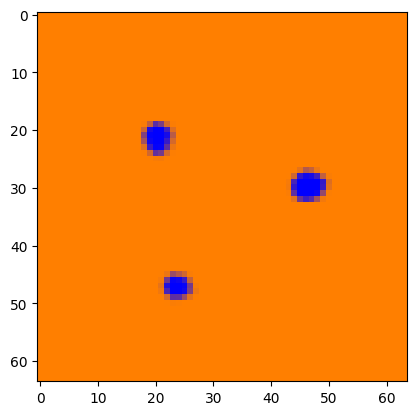

In [9]:
plt.imshow(TrioDotColor)

In [10]:
volumeLight = MySuperLight.single_frame_pipe(
                        TrioDot, TrioDotColor, TrioDot, TrioDot, [0, 2, 0.5], 
                        specular_color = 0.03, ambient_color = 0, 
                        reflection_factor = 5, light_strength = 4,
                        threshhold = 0.00001, column_fat = 0.05, sss = 0.25,
                        volume_normal_ratio = 0, mask_prominence=0, return_combined=True)

FRAME GEN BEGUN...
FRAME GEN FINISHED!


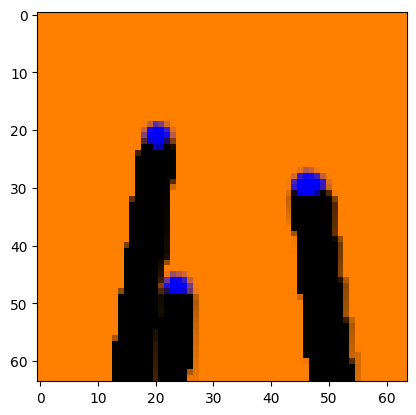

In [11]:
plt.imshow(volumeLight)

In [15]:
relit_albedos = np.zeros((24, 64,64,3))
for i in range(24):
    relit_albedos[i] = MySuperLight.single_frame_pipe(
                        TrioDot, TrioDotColor, TrioDot, TrioDot, vector_list[i], 
                        specular_color = 0.03, ambient_color = 0, 
                        reflection_factor = 5, light_strength = 4,
                        threshhold = 0.00001, column_fat = 0.05, sss = 0.25,
                        volume_normal_ratio = 0.0, mask_prominence=0)
final_image = np.concatenate([
    np.concatenate(relit_albedos[0:6], axis = 1),
    np.concatenate(relit_albedos[6:12], axis = 1),
    np.concatenate(relit_albedos[12:18], axis = 1),
    np.concatenate(relit_albedos[18:24], axis = 1)   
    ], axis = 0 )

FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!
FRAME GEN BEGUN...
FRAME GEN FINISHED!


In [ ]:
relit_albedos = np.zeros((24, 64,64,3))
for i in range(24):
    relit_albedos[i] = MySuperLight.single_frame_pipe(
                        myNormal, myAlbedo, myDepth, myMask, vector_list[i], 
                        specular_color = 0.3, ambient_color = 0, 
                        reflection_factor = 5, light_strength = 4,
                        threshhold = 0.00001, column_fat = 0.05, sss = 0.25,
                        volume_normal_ratio = 0.7, mask_prominence=0)
final_image = np.concatenate([
    np.concatenate(relit_albedos[0:6], axis = 1),
    np.concatenate(relit_albedos[6:12], axis = 1),
    np.concatenate(relit_albedos[12:18], axis = 1),
    np.concatenate(relit_albedos[18:24], axis = 1)   
    ], axis = 0 )

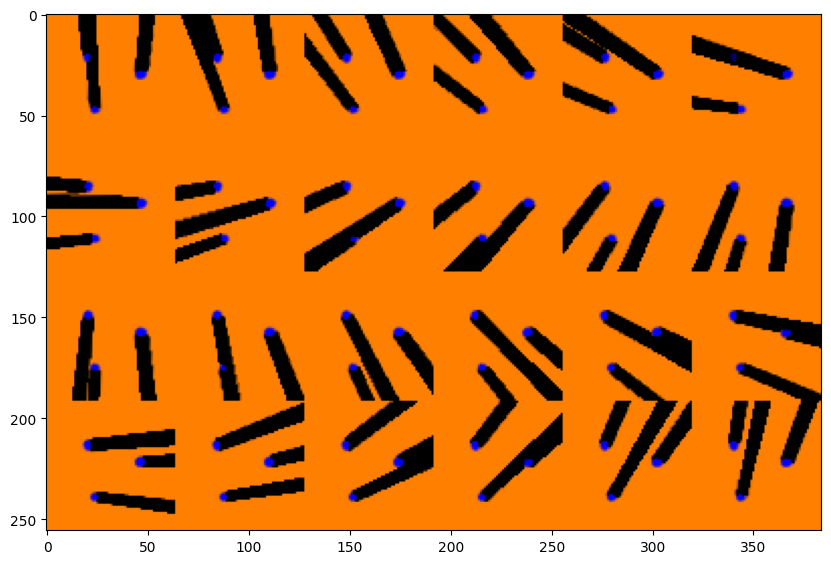

In [16]:
plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(final_image)

In [17]:
# GIFMAKER
images_array = (relit_albedos * 255).astype(np.uint8)
images = []
for img in images_array:
    images.append(Image.fromarray(img).resize((128, 128)))

images[0].save('dots_gif.gif',
               save_all=True,
               append_images=images[1:],
               duration=100, 
               loop=0)